# Cardiovascular Disease Prediction

## Data Description 
Overview

This dataset consolidates information from two primary sources:
- UCI Machine Learning Repository - Heart Disease Dataset
- Kaggle - Heart Disease Dataset by YasserH

The primary aim is to predict the presence or absence of cardiovascular disease based on various patient metrics. <br>

Variables
- ID: Unique identifier for each patient.
- age: Age of the patient in days.
- age_years: Age of the patient in years (derived from age).
- gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
- height: Height of the patient in centimeters.
- weight: Weight of the patient in kilograms.
- ap_hi: Systolic blood pressure.
- ap_lo: Diastolic blood pressure.
- cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
- alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
- active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
- cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
- bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
- bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
- bp_category_encoded: Encoded form of bp_category for machine learning purposes.

Data Source and Acknowledgment
- Data was sourced from the UCI Machine Learning Repository and Kaggle.
- All patient data has been anonymized to ensure privacy.

Link: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease

## Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import csv
import os
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc



## Data

In [98]:
# Data
df = pd.read_csv('../Data/cardio_data_processed.csv', index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


## EDA

In [99]:
df.shape

(68205, 16)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68205 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  68205 non-null  int64  
 1   gender               68205 non-null  int64  
 2   height               68205 non-null  int64  
 3   weight               68205 non-null  float64
 4   ap_hi                68205 non-null  int64  
 5   ap_lo                68205 non-null  int64  
 6   cholesterol          68205 non-null  int64  
 7   gluc                 68205 non-null  int64  
 8   smoke                68205 non-null  int64  
 9   alco                 68205 non-null  int64  
 10  active               68205 non-null  int64  
 11  cardio               68205 non-null  int64  
 12  age_years            68205 non-null  int64  
 13  bmi                  68205 non-null  float64
 14  bp_category          68205 non-null  object 
 15  bp_category_encoded  68205 non-null  obje

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68205.0,19462.667737,2468.381854,10798.000000,17656.000000,19700.000000,21323.000000,23713.000000
gender,68205.0,1.348625,0.476539,1.000000,1.000000,1.000000,2.000000,2.000000
height,68205.0,164.372861,8.176756,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68205.0,74.100688,14.288862,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68205.0,126.434924,15.961685,90.000000,120.000000,120.000000,140.000000,180.000000
ap_lo,68205.0,81.263925,9.143985,60.000000,80.000000,80.000000,90.000000,120.000000
cholesterol,68205.0,1.363243,0.678080,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,68205.0,1.225174,0.571288,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68205.0,0.087662,0.282805,0.000000,0.000000,0.000000,0.000000,1.000000
alco,68205.0,0.053134,0.224302,0.000000,0.000000,0.000000,0.000000,1.000000


In [102]:
# Check for null values 
df.isna().sum()

age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

There seems to be no null values.

In [103]:
# check for duplicated records
df.duplicated().sum()

np.int64(24)

In [104]:
# dropping bp_category_encoded as it contains same values as bg_category
df = df.drop(columns='bp_category_encoded',axis=1)

# dropping age as age years can be used 
df = df.drop(columns='age',axis=1)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
id,,,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [105]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [106]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != "y"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O" and feature != "y"]
numerical_features, categorical_features

(['gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio',
  'age_years',
  'bmi'],
 ['bp_category'])

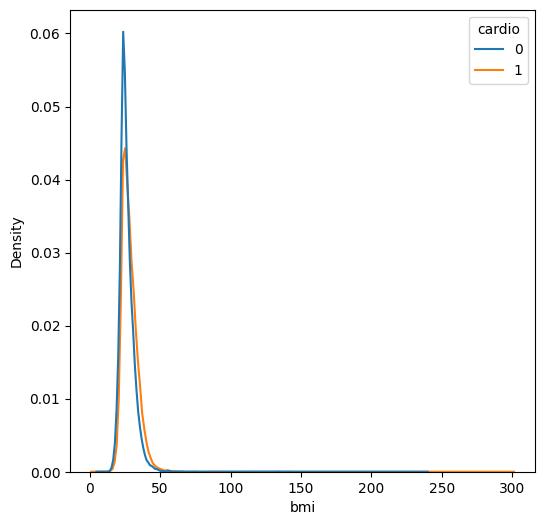

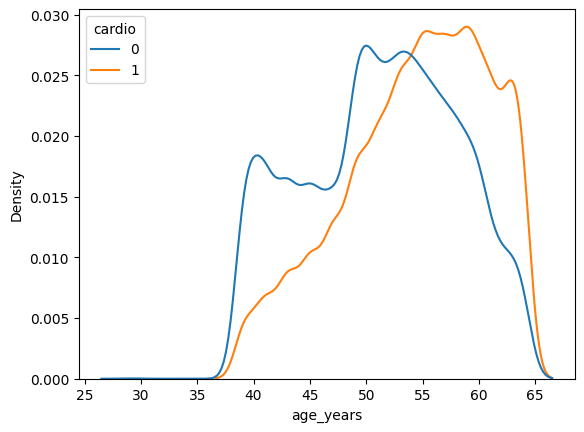

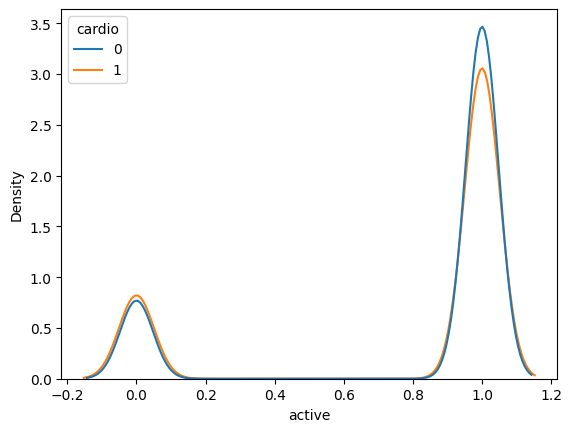

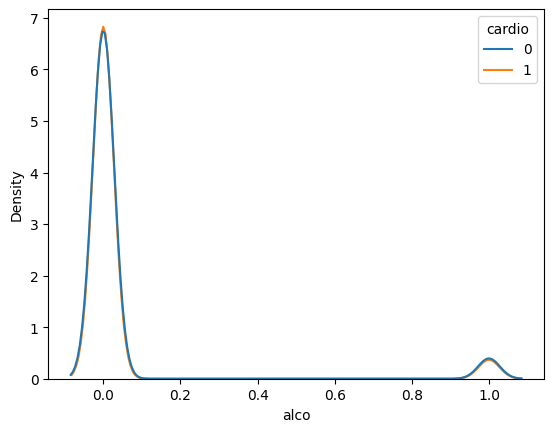

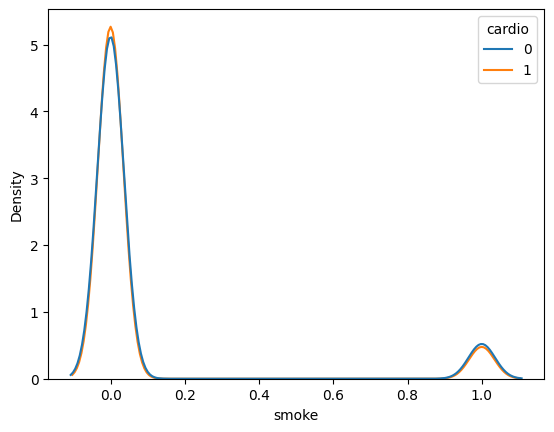

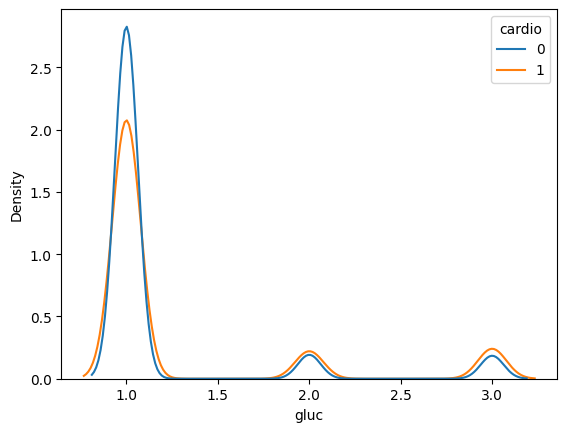

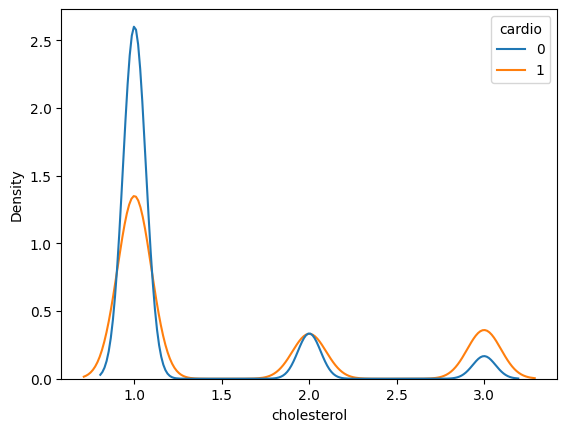

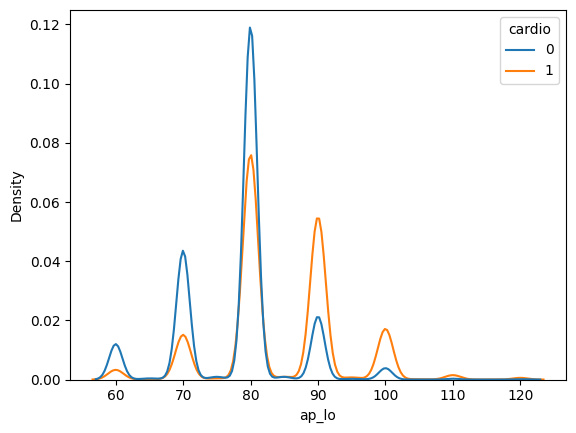

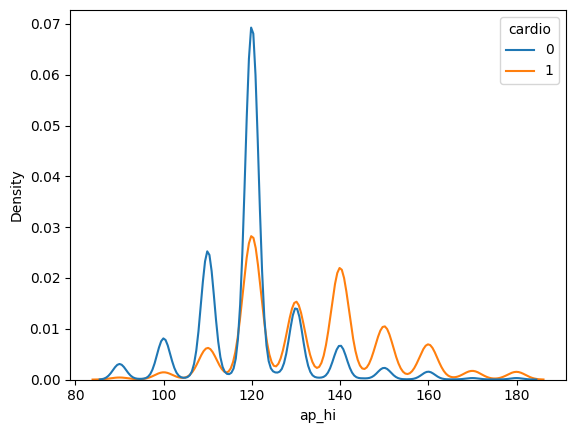

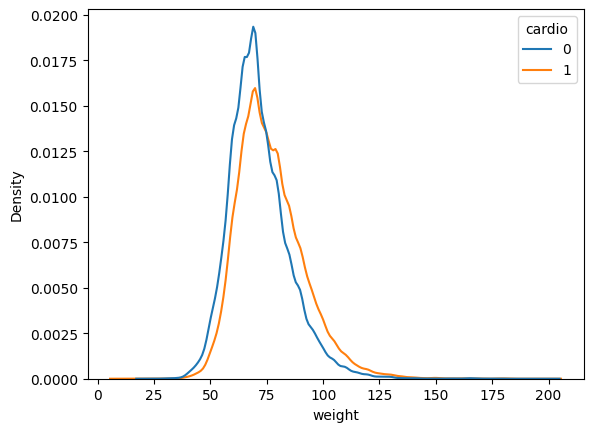

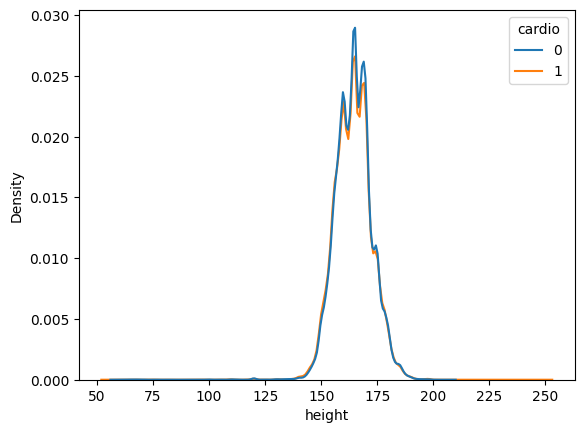

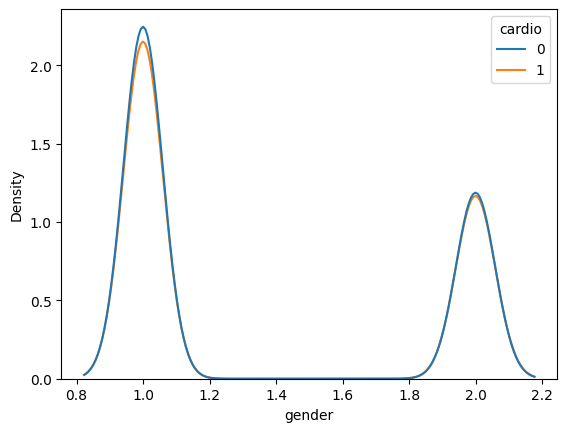

In [107]:
plt.figure(figsize=(6,6))
num_feat = numerical_features[::-1]
num_feat.remove('cardio')
for feature in num_feat:
    if numerical_features == 'cardio':
        continue
    sns.kdeplot(data=df, x=feature, hue='cardio')
    plt.show()

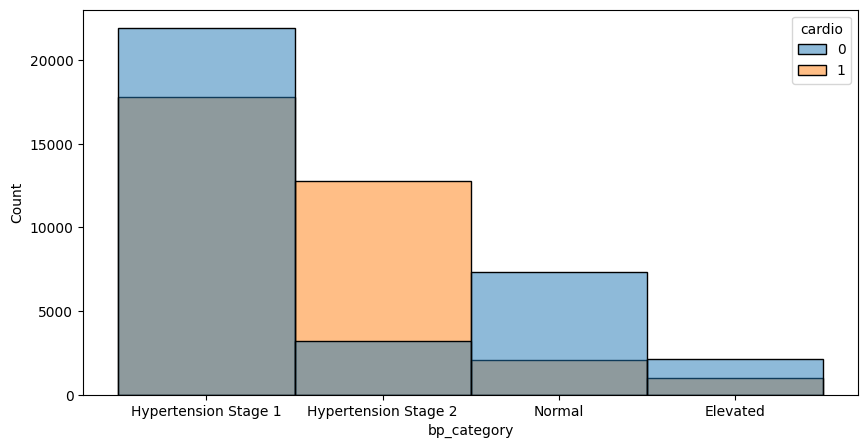

In [110]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=feature, hue='cardio')
    plt.show()

In [111]:
# encoding categorical attributes 
OE=OrdinalEncoder(categories=[['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']])
OE.fit(df[['bp_category']])

df['bp_encoded']=OE.transform(df[['bp_category']])
df=df.drop(columns='bp_category',axis=1)

df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_encoded
id,,,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,3.0
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,2.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3.0
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0.0


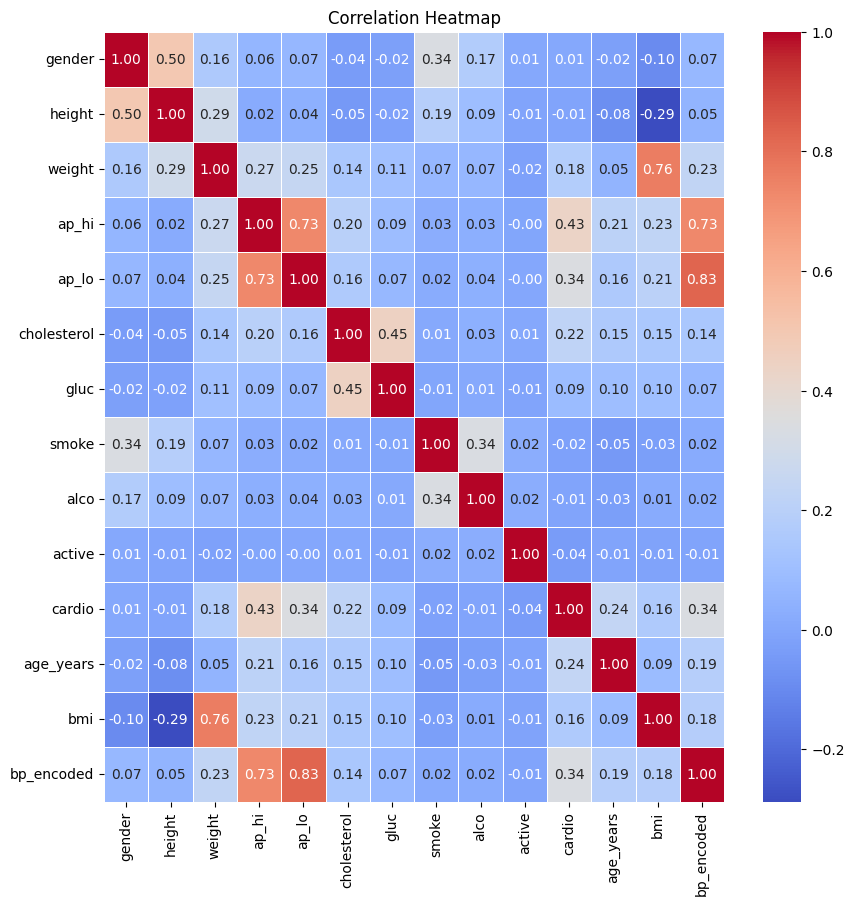

In [112]:
# Plots 
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [113]:
corr_matrix['cardio']

gender         0.006098
height        -0.011276
weight         0.177829
ap_hi          0.433802
ap_lo          0.342900
cholesterol    0.220778
gluc           0.088905
smoke         -0.016567
alco          -0.009038
active        -0.037944
cardio         1.000000
age_years      0.238875
bmi            0.162880
bp_encoded     0.340805
Name: cardio, dtype: float64

In [ ]:
# checking if dataset is misbalanced
df['cardio'].value_counts() / df.shape[0]

cardio
0    0.506312
1    0.493688
Name: count, dtype: float64

## Model training

Independent variable: Cardio \
Dependent variable:  ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi',
       'bp_category' ]

In [124]:
df.shape

(68205, 14)

In [132]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_encoded
id,,,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,3.0
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,2.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3.0
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0.0


In [122]:
y = df['cardio']
X = df.drop(['cardio'], axis=1)

In [123]:
y.shape, X.shape

((68205,), (68205, 13))

In [129]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

In [130]:
X_train.shape, X_test.shape

((61384, 13), (6821, 13))

In [131]:
# standardizing the dataset
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [161]:
def save_result_data(result_data, csv_file_path="training-log/model_result.csv", dir='training-log'):
    if os.path.exists(csv_file_path):
        with open(csv_file_path, 'a') as csvfile:
            csvwriter = csv.writer(csvfile)   
            csvwriter.writerow(result_data)

    else:
        os.mkdir(dir)

        with open(csv_file_path, 'w') as csvfile:
            csvwriter = csv.writer(csvfile)   
            csvwriter.writerow(['Name', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC_AUC Score'])
            csvwriter.writerow(result_data)

    csvfile.close()

def model_save(model,file_name, dir='model'):
    path = os.path.join(dir, file_name)

    if os.path.exists(dir):
        pass
    else:
        os.mkdir(dir)
        
    with open(path, 'wb') as file:
        pickle.dump(model, file)

In [162]:
def roc_auc_display(test_result, model_name):
    print(test_result)
    for name in model_name:
        fpr, tpr, _ = roc_curve(test_result['y_test'], test_result[name] )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Two Models')
    plt.legend()
    plt.show()

def evaluate_model(model_list, model_name):
    pred_log = dict()
    pred_log['y_test'] = y_test
    model_dict = dict()
    result_log = dict()


    for model, name in zip(model_list, model_name):
        model_base = model
        model_base.fit(X_train, y_train)
        y_pred = model_base.predict(X_test)
        pred_log[name] = y_pred
        model_dict[name] = model_base

        result = [
            name,
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred)
        ]

        print(result)
        save_result_data(result)  
        result_log[name] = result  

        print(f'Confusion metrics {name}: ')
        conf_matrix = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
        cm_display.plot()
        plt.show() 
            
        file_name = name + ".pkl"
        model_save(model, file_name)
    
    roc_auc_display(pred_log, model_name)

    return pred_log, model_dict, result_log

['log_reg', 0.7280457410936813, 0.7505154639175258, 0.6592212496226985, 0.7019122609673791, np.float64(0.7261328597030254)]
Confusion metrics log_reg: 


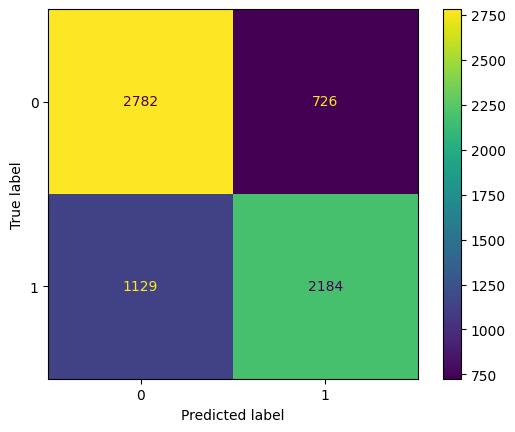

['clf', 0.706201436739481, 0.6988757216651473, 0.6942348324781165, 0.6965475469412478, np.float64(0.7058688415526272)]
Confusion metrics clf: 


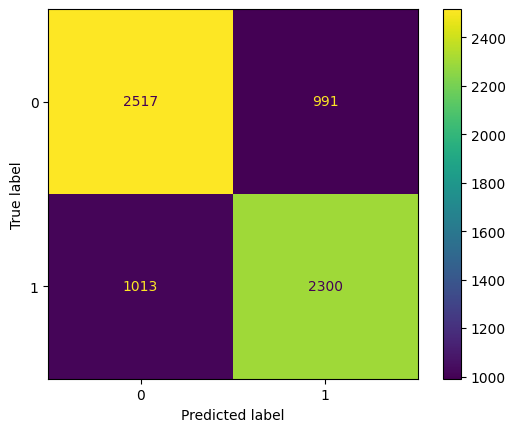

['gb', 0.7312710746224894, 0.7427821522309711, 0.6833685481436764, 0.711837761358277, np.float64(0.7299396902634003)]
Confusion metrics gb: 


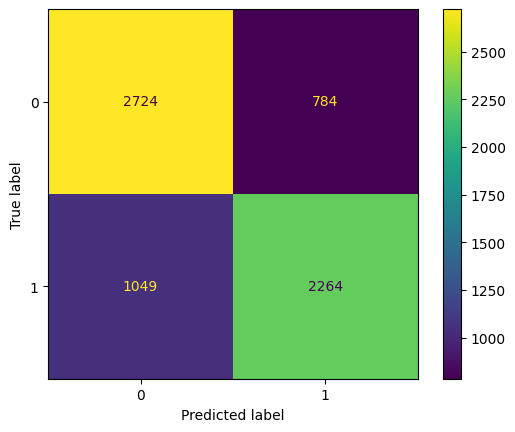

['ada', 0.7261398621902947, 0.7599856063332134, 0.6374886809538183, 0.6933683519369666, np.float64(0.7236759254255978)]
Confusion metrics ada: 


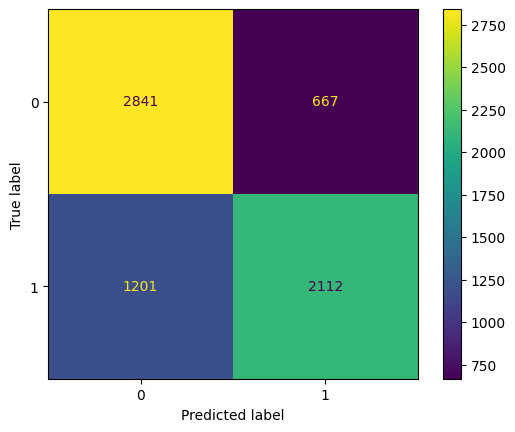

['dt_gini', 0.6345110687582466, 0.6278852152214598, 0.6076063990341081, 0.6175793833410033, np.float64(0.6337632907371225)]
Confusion metrics dt_gini: 


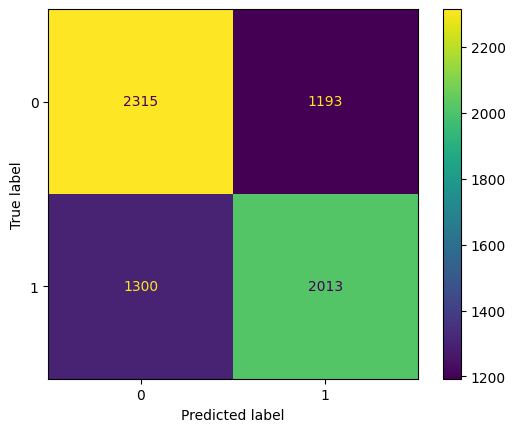

['dt_en', 0.6384694326345111, 0.631236442516269, 0.6148505885904014, 0.6229357798165137, np.float64(0.6378129795859646)]
Confusion metrics dt_en: 


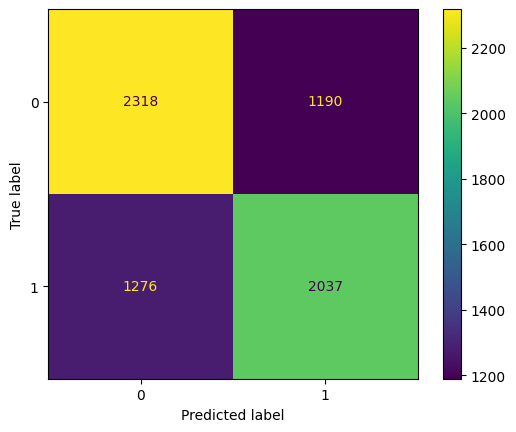

['knn', 0.6906611933734057, 0.6829936111956191, 0.6776335647449442, 0.6803030303030303, np.float64(0.6902991084842167)]
Confusion metrics knn: 


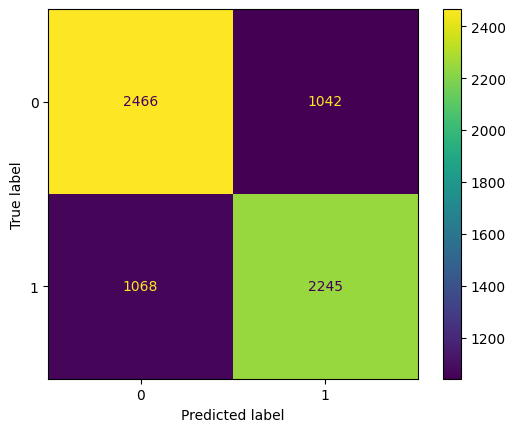

['svc', 0.7309778624835068, 0.7551795580110497, 0.6601267733172351, 0.7044612659043324, np.float64(0.7290086546175685)]
Confusion metrics svc: 


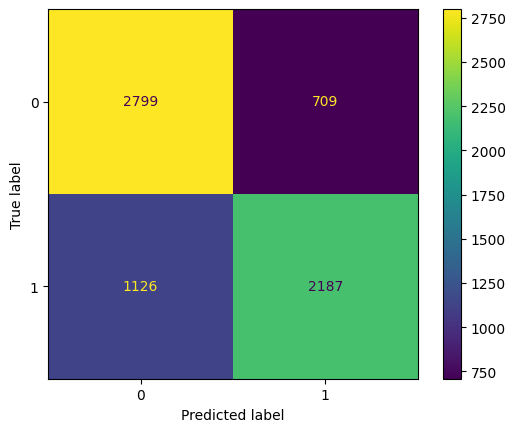

['gnb', 0.7149978009089576, 0.7412759957701798, 0.6347721098702083, 0.6839024390243903, np.float64(0.7127680389715922)]
Confusion metrics gnb: 


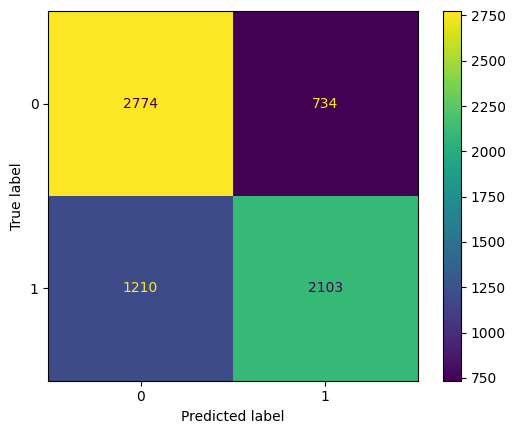

['bnb', 0.7119190734496408, 0.7303485987696514, 0.6450347117416239, 0.6850456803974996, np.float64(0.7100601152778815)]
Confusion metrics bnb: 


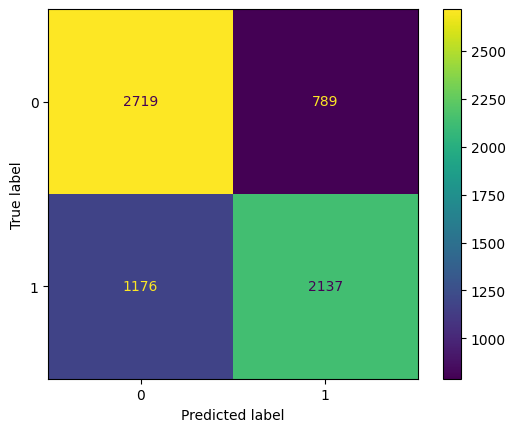

['mlp', 0.7314176806919807, 0.7479075995982591, 0.6743133111983097, 0.7092063492063492, np.float64(0.7298305438545709)]
Confusion metrics mlp: 


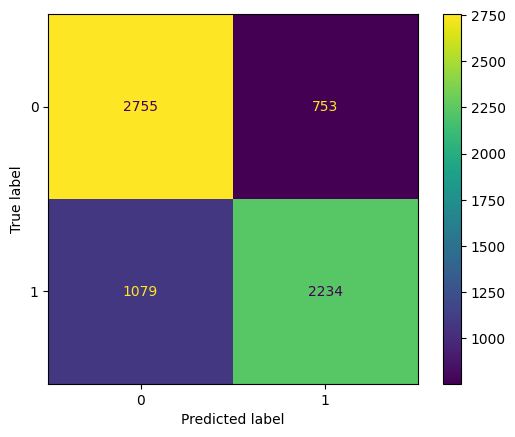

{'y_test': id
40093    0
84168    0
80431    0
50242    0
19786    1
        ..
58713    0
14334    0
62779    0
70146    1
29478    1
Name: cardio, Length: 6821, dtype: int64, 'log_reg': array([0, 1, 0, ..., 0, 0, 0]), 'clf': array([1, 1, 0, ..., 0, 0, 1]), 'gb': array([1, 1, 0, ..., 0, 0, 1]), 'ada': array([0, 1, 0, ..., 0, 0, 1]), 'dt_gini': array([1, 0, 1, ..., 0, 0, 1]), 'dt_en': array([0, 1, 1, ..., 0, 0, 1]), 'knn': array([1, 1, 1, ..., 0, 0, 1]), 'svc': array([0, 1, 0, ..., 0, 0, 1]), 'gnb': array([0, 1, 0, ..., 0, 0, 0]), 'bnb': array([0, 1, 0, ..., 0, 0, 1]), 'mlp': array([0, 1, 0, ..., 1, 1, 1])}


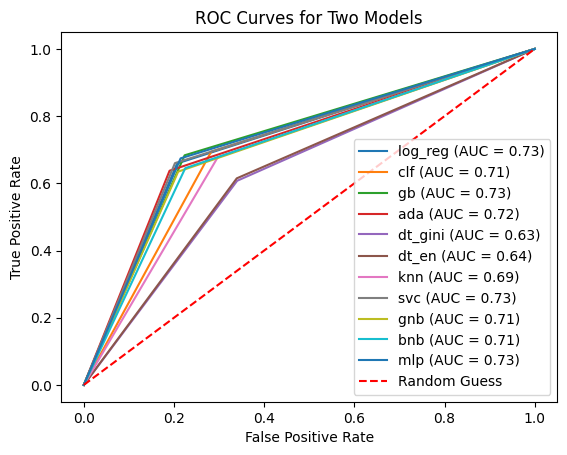

In [163]:
# Model 
model_logistic_regression = LogisticRegression()
model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_dt_en = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_svc = SVC() 
model_gnb = GaussianNB()
model_bnb = BernoulliNB()
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100, random_state=42)

model_list = [model_logistic_regression, model_clf, model_gb, model_ada, model_dt_gini, model_dt_en, model_knn, model_svc, model_gnb, model_bnb, model_mlp]
model_name = ["log_reg", "clf", "gb", "ada", "dt_gini", "dt_en", "knn", "svc", "gnb", "bnb", "mlp"]

pred_log, model_log, result_log = evaluate_model(model_list, model_name)


In [165]:
# Feature importance
print("Feature importance (Logistic Regression) (Coefficient and Odds Ratio):: ")
model_log_reg = model_log['log_reg']

# Coefficients and Odds Ratios
coefficients = model_log_reg.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Feature importance (Logistic Regression) (Coefficient and Odds Ratio):: 
        Feature  Coefficient  Odds Ratio
3         ap_hi     0.939040    2.557525
10    age_years     0.346765    1.414484
5   cholesterol     0.342896    1.409022
2        weight     0.198451    1.219513
4         ap_lo     0.129810    1.138612
0        gender    -0.013203    0.986884
12   bp_encoded    -0.040656    0.960159
7         smoke    -0.044393    0.956578
11          bmi    -0.046949    0.954136
8          alco    -0.049814    0.951407
1        height    -0.055342    0.946162
6          gluc    -0.076876    0.926004
9        active    -0.090675    0.913314


Feature importance (Random Forest) (Coefficient and Odds Ratio):: 


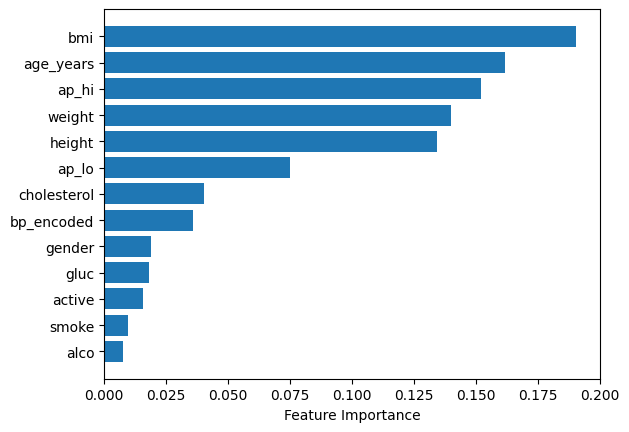

In [168]:
# Feature importance
print("Feature importance (Random Forest) (Coefficient and Odds Ratio):: ")
clf = model_log['clf']
importances = clf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

According to the above table and chart, we can say that bmi, age, weight, height, cholestrol, blood pressure are some important factors in deciding whether someone is getting a cardiovascular disease. 